In [1]:
df <- readr::read_csv('hotels.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  hotel = col_character(),
  arrival_date_month = col_character(),
  meal = col_character(),
  country = col_character(),
  market_segment = col_character(),
  distribution_channel = col_character(),
  reserved_room_type = col_character(),
  assigned_room_type = col_character(),
  deposit_type = col_character(),
  agent = col_character(),
  company = col_character(),
  customer_type = col_character(),
  reservation_status = col_character(),
  reservation_status_date = col_date(format = "")
)

See spec(...) for full column specifications.



In [2]:
head(df)

hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<date>
Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NULL,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03
Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03


In [3]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggrepel)

Warning message:
"package 'dplyr' was built under R version 4.0.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyr' was built under R version 4.0.3"


In [56]:
pltdf <- df %>% 
    group_by(arrival_date_year , hotel , is_canceled) %>% 
    summarise(count = n()) %>% 
    mutate(ratio=round((count/sum(count)),digits= 2) ) 
 

`summarise()` regrouping output by 'arrival_date_year', 'hotel' (override with `.groups` argument)



arrival_date_year,hotel,is_canceled,count,ratio
<dbl>,<chr>,<dbl>,<int>,<dbl>
2015,City Hotel,0,7678,0.56
2015,City Hotel,1,6004,0.44
2015,Resort Hotel,0,6176,0.74
2015,Resort Hotel,1,2138,0.26
2016,City Hotel,0,22733,0.60
2016,City Hotel,1,15407,0.40
2016,Resort Hotel,0,13637,0.73
2016,Resort Hotel,1,4930,0.27
2017,City Hotel,0,15817,0.57


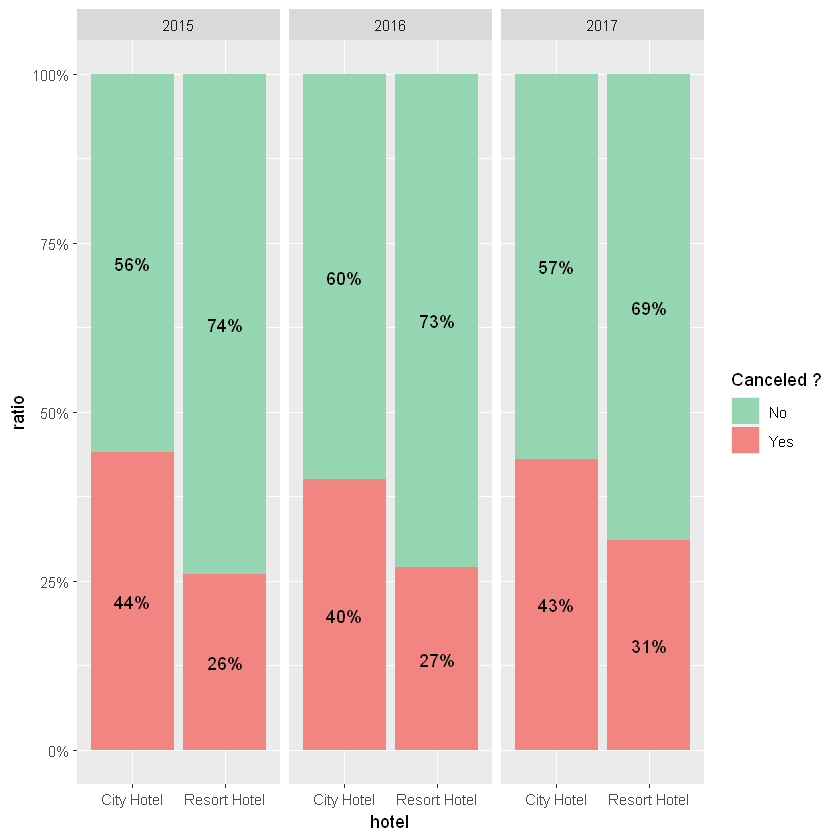

In [86]:
(
    ggplot(pltdf , aes(x=hotel , y=ratio , fill=factor(is_canceled)))
    + geom_col(position=position_fill())
    + facet_wrap(~ arrival_date_year)
    + scale_y_continuous(labels=scales::percent)
    + geom_text(aes(y = ratio, label = scales::percent(ratio , accuracy = 1)),
                  position=position_fill(0.5), color = "black")
    + scale_fill_manual(values = c("#95d5b2", "#f28482") , name="Canceled ?" , labels=c("No" , "Yes"))
    #+ theme(legend.title = element_text("Canceled ?"))
)

In [98]:
library(Rtsne)

Warning message:
"package 'Rtsne' was built under R version 4.0.3"


In [138]:
sampleddf <- df %>% select(total_of_special_requests , required_car_parking_spaces , booking_changes ,is_repeated_guest , adults,lead_time , previous_cancellations,days_in_waiting_list , adr , is_canceled)
sampleddf <- sampleddf[!duplicated(sampleddf) , ] %>%  drop_na()
idx <- sample(nrow(sampleddf), 30000)
sampleddf <- sampleddf[idx, ]

In [142]:
library(rpart)
library(rpart.plot)

Warning message:
"package 'rpart.plot' was built under R version 4.0.2"


In [149]:
sdf <- df %>% select(total_of_special_requests , required_car_parking_spaces , booking_changes ,is_repeated_guest , adults,lead_time , previous_cancellations,days_in_waiting_list , adr , is_canceled)
sdf$is_canceled <- if_else(sdf$is_canceled == 0, "no", "yes") %>% as.factor()
fit <- rpart(is_canceled ~ ., method="class", data=sdf)

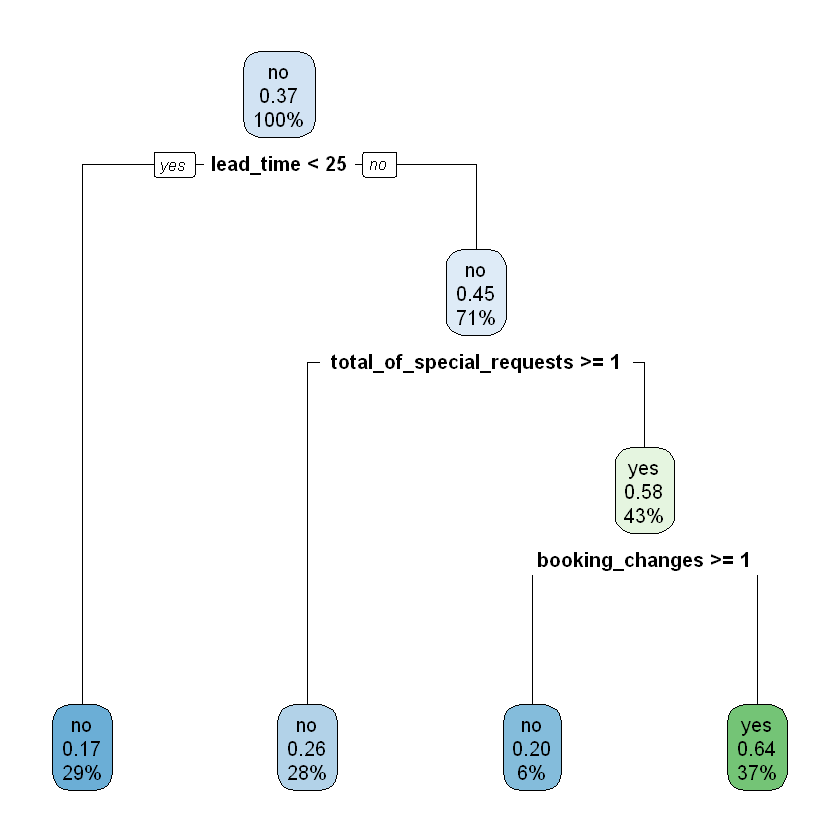

In [150]:
    rpart.plot(fit)

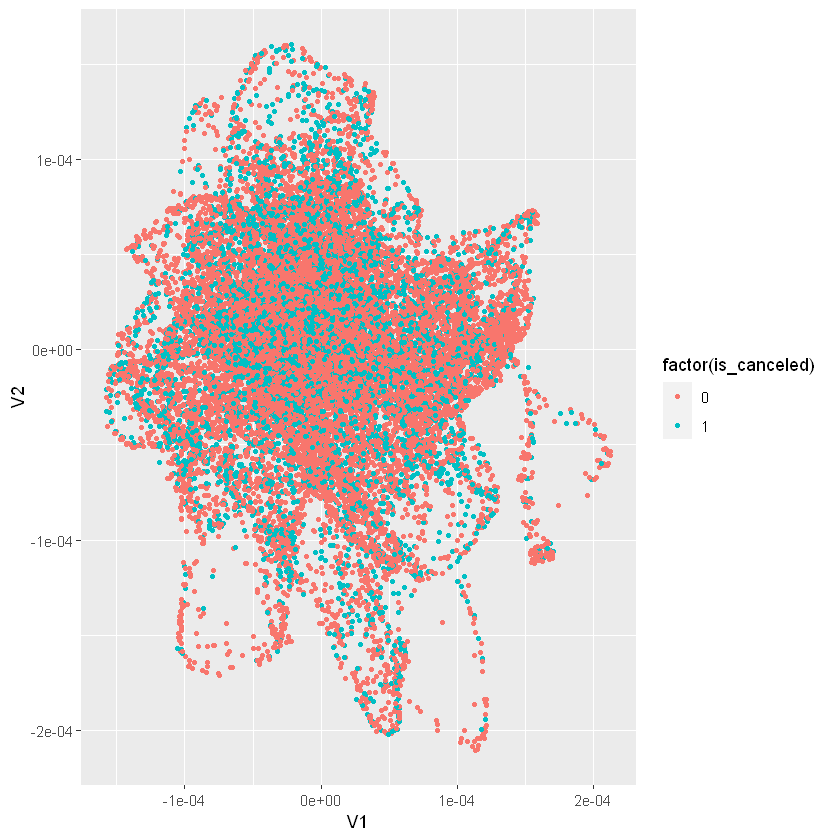

In [137]:
tsnedf <- tsne$Y %>% as.data.frame()
tsnedf$is_canceled <- sampleddf$is_canceled
ggplot(tsnedf, aes(x=V1 , y=V2 , color=factor(is_canceled))) + geom_point(stroke=0)